<a href="https://www.kaggle.com/rinichristy/k-nn-classification-on-social-network-ad?scriptVersionId=90023776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-Nearest Neighbors (K-NN) Classification on Social Network Ad**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**

In [2]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


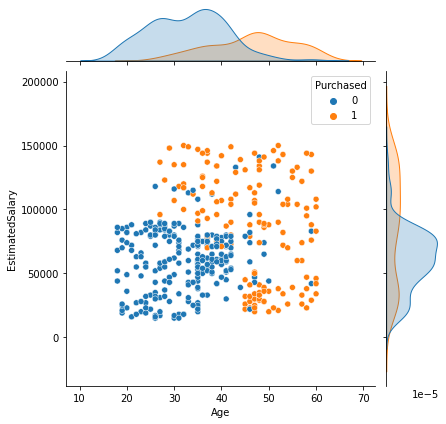

In [3]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df, hue = 'Purchased', kind= 'scatter');

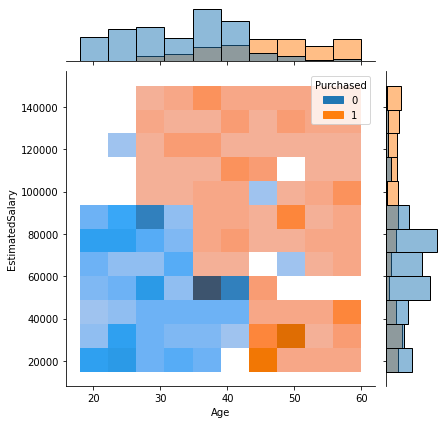

In [4]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df, hue = 'Purchased', kind= 'hist');

In [5]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

## **Splitting the dataset into the Train set and Test set**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Training the K-NN model on the Train set**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## **Predicting the Test set results**

In [9]:
y_pred = classifier.predict(X_test)

## **Generating the Confusion Matrix and Classification report**

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of LogisticRegression Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of LogisticRegression Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for LogisticRegression Model:' '\n',classification_report(y_test, y_pred))

Accuracy of LogisticRegression Model is  0.93

 
 Confusion Matrix of LogisticRegression Model:
 [[64  4]
 [ 3 29]]

 
 Classification Report for LogisticRegression Model:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## **Computing the accuracy with k-Fold Cross Validation**

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.67 %
Standard Deviation: 6.63 %


## **Decision Boundary**

### **Visualizing the Train set results**

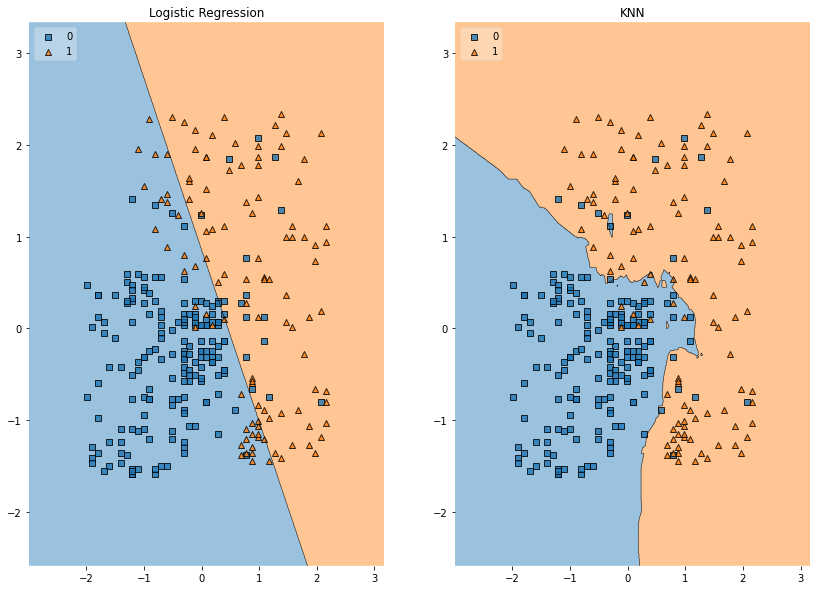

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression', 'KNN'] 
for clf, lab, grd in zip([clf1, clf2], 
                         labels,
                         [(0,0), (0,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

### **Visualization using ListedColormap**

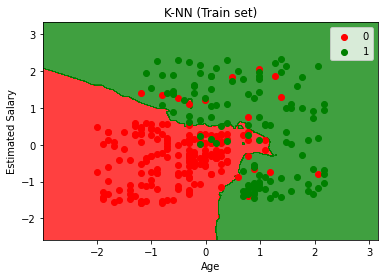

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### **Visualizing the Test set results**

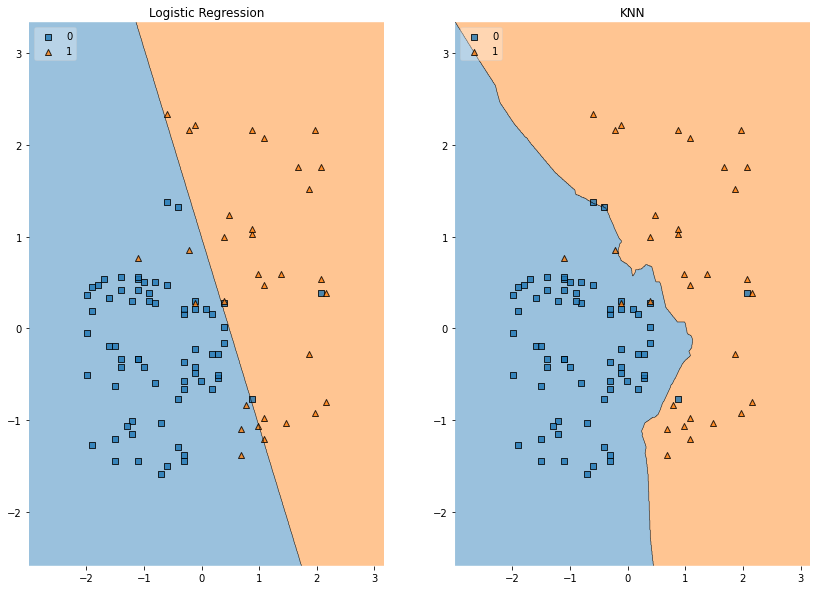

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression', 'KNN'] 
for clf, lab, grd in zip([clf1, clf2], 
                         labels,
                         [(0,0), (0,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

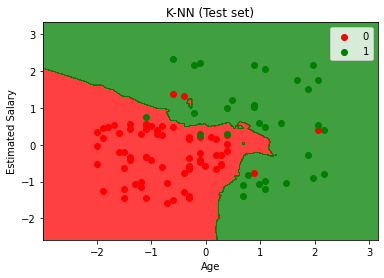

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()